<a href="https://colab.research.google.com/github/GomezIker/master-IA-ejercicios/blob/main/Actividad_3_Percepci%C3%B3n_Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [265]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import data, img_as_float
from skimage.color import rgb2grey
from skimage.segmentation import (watershed, mark_boundaries, quickshift)
from skimage.metrics import (adapted_rand_error, variation_of_information, mean_squared_error)

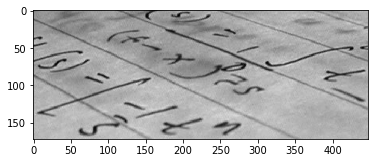

In [304]:
# Importamos la imagen que usaremos en esta actividad
text = data.text()
plt.imshow(text,cmap=plt.cm.gray)

## Pasos a seguir para conseguir una imagen GROUND TRUTH

In [305]:
# Calculamos los bordes de los elementos de la image, usando el algoritmo de CANNY
edges = cv2.Canny(text,100,200)

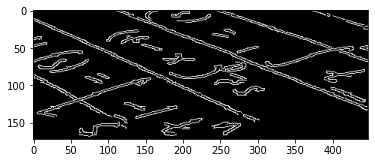

In [307]:
# Podemos ver que el algoritmo funciona bastante bien con esos 2 parámetros de threshold
plt.imshow(edges,cmap=plt.cm.gray)

In [308]:
# A continuación, vamos a intentar rellenar cada elemento de la imagen.
# Para ello, generamos un kernel 5x5 y sobre la imagen, aplicaremos un cierre
kernel = np.ones((5,5),dtype='uint8')


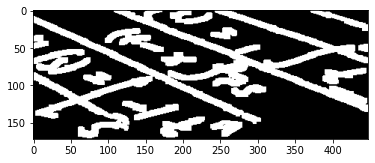

In [309]:
# realizamos un cierre (dilatación seguido de erosión) para rellenar los objetos y eliminar píxeles de ruido

dilation = cv2.dilate(edges,kernel,iterations=1)
plt.imshow(dilation,cmap=plt.cm.gray)

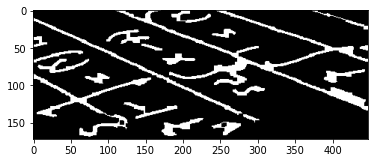

In [311]:
erosion = cv2.erode(dilation,kernel,iterations=1)
# Nos devuelve 256 "etiquetas" pero queremos "binarizar la imagen", por tanto, todo lo que no sea un 0, lo ponemos a 1
# Esto nos simplificará más tarde la generación de la matriz de confusión y el cálculo de métricas
erosion[erosion>0]=1
plt.imshow(erosion,cmap=plt.cm.gray)

#### Por tanto, esta será la imagen que tomaremos como GROUND TRUTH

## Aplicamos el segmentador

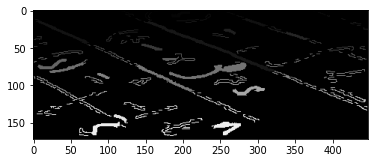

In [315]:
# Vamos a segmentar la imagen partiendo de los bordes detectados con CANNY
from scipy import ndimage as ndi
from skimage.morphology import remove_small_objects

# Rellenamos los huecos que han dejado los elementos detectados por CANNY
fill = ndi.binary_fill_holes(edges)
# Eliminamos pequeños elementos que pueden considerarse ruido
im_canny = ndi.label(remove_small_objects(fill,5))[0]
# Resultado de la imagen segmentada en escala de grises
plt.imshow(im_canny,cmap=plt.cm.gray)

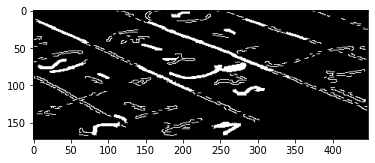

In [316]:
# Binarizamos esta imagen también. Para tener únicamente valores 0 y 1, lo cual nos simplifique el cálculo de métricas
# Todo lo que no sea negro, lo ponemos a blanco
otra = im_canny.copy()
otra[otra>0] = 1
plt.imshow(otra,cmap=plt.cm.gray)

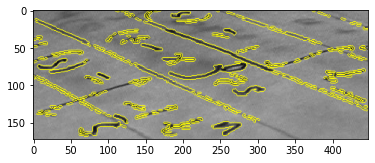

In [324]:
# Vemos los elementos segmentados plasmados en la imagen original
plt.imshow(mark_boundaries(text, otra))

## Calculamos las métricas para ver si el segmentador ha funcionado

In [323]:
# Comparamos los píxeles de la imagen GROUND TRUTH con los píxeles de la imagen generada por el segmentador.
# Obtenemos la matriz de confusión y los valores TP,FN,FP y TN
from sklearn.metrics import confusion_matrix
tp, fn, fp, tn = confusion_matrix(erosion.flatten(), otra.flatten()).flatten()
recall = tp / (tp+fn)
precision = tp / (tp+fp)
accuracy = (tp+tn) / (tp+fn+fp+tn)
f1_score = (2*recall*precision) / (recall+precision)
fp_rate = fp / (fp+tn)
print("Recall: {:.5f}".format(recall))
print("Precision: {:.5f}".format(precision))
print("Accuracy: {:.5f}".format(accuracy))
print("F1 Score: {:.5f}".format(f1_score))
print("False Positive Rate: {:.5f}".format(fp_rate))


Recall: 0.99942
Precision: 0.92878
Accuracy: 0.93439
F1 Score: 0.96280
False Positive Rate: 0.43333


Podemos decir que para esta imagen, el proceso de segmentación ha funcionado bien, ya que, viendo las métricas, observamos una precisión de casi 92,8% y un accuracy del 93%.

## FUENTES
https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_metrics.html#sphx-glr-auto-examples-segmentation-plot-metrics-py

https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_segmentations.html#sphx-glr-auto-examples-segmentation-plot-segmentations-py

